# GDAL Tutorial

Welcome to a brief introduction for how to use GDAL. GDAL is a geoprocessing and translator library for raster and vector geospatial data. It is able to be used in the terminal, in Python, and in other instances such as the GDAL plugin for QGIS.



### Import necessary packages

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

### Import raster data
Here we import an example raster file containing elevation data in meters, found around London.

In [2]:
ds = gdal.Open("Data/Raster/digital_elevation_model.tif")

### Investigate the data
Below we will learn more about the data in our raster file and also plot it using matplotlib.

In [3]:
ds.GetProjection() # Show projection information. It looks like ours is in WGS-84, standardly used with GPS.

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [4]:
band = ds.GetRasterBand(1)

In [5]:
array = band.ReadAsArray()

In [6]:
print ("Array shape: %s" % (str(array.shape)))
print ("Mean value: %i"  % (array.mean()))
print ("Max value: %i"  % (array.max()))
print ("Min value: %i" % (array.min()))

Array shape: (3601, 3601)
Mean value: 87
Max value: 297
Min value: -35


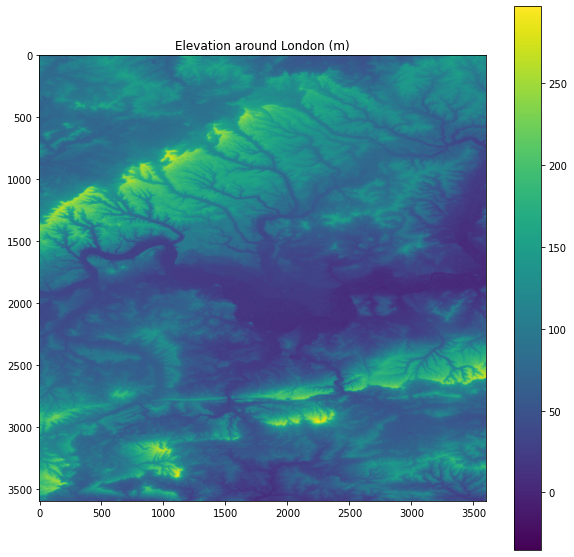

In [7]:
plt.figure(figsize=(10,10))
plt.title("Elevation around London (m)")
plt.imshow(array)
plt.colorbar()

In [8]:
binmask = np.where((array >= 50), 1, 0) # mask everything below 50 meters

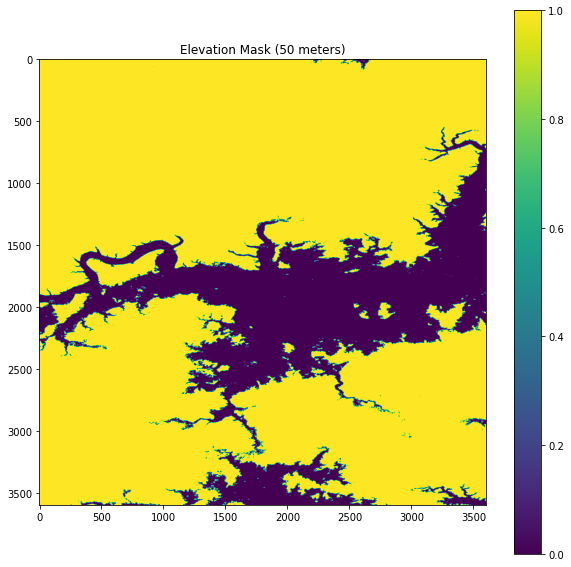

In [9]:
plt.figure(figsize=(10, 10))
plt.title("Elevation Mask (50 meters)")
plt.imshow(binmask)
plt.colorbar()

###  Reproject to Mercator Projection

The Mercator projection (EPSG 3857), also known as the "Web Mercator" or "Pseudo-Mercator" projection, is commonly used for web mapping (ex. this is what Google Maps utilizes). The following code will reproject our data from WGS-84 to the Mercator projection and allow us to view the resulting image.

In [10]:
warp = gdal.Warp("Data/Raster/reprojected.tif", "Data/Raster/digital_elevation_model.tif", dstSRS='EPSG:3857')
warp = None # Closes the above files. This is odd syntax, but is how it is classically done in GDAL.

In [11]:
merc_ds = gdal.Open("Data/Raster/reprojected.tif")
merc_band = merc_ds.GetRasterBand(1)
merc_array = merc_band.ReadAsArray()

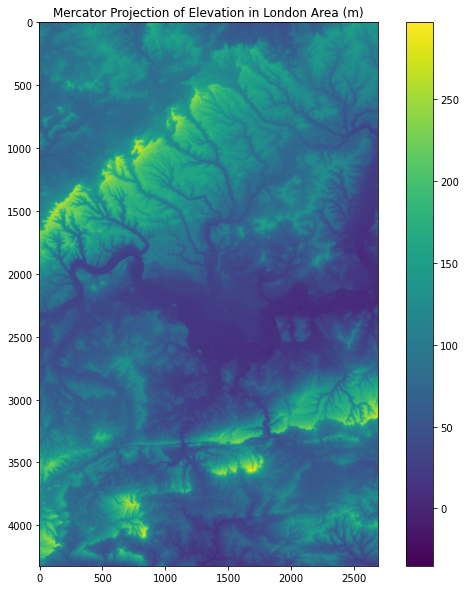

In [12]:
plt.figure(figsize=(10,10))
plt.title("Mercator Projection of Elevation in London Area (m)")
plt.imshow(merc_array)
plt.colorbar()

### Closing Thoughts

Notice how the Mercator projection and WGS-84 raster files look fairly different when they are visualized. This is because there are many different ways to represent information on maps, each one with its own pros and cons. The Mercator projection is classically good for directions, hence its frequent use in web mapping software like Google Maps where as others like WGS-84 are actually a geographic coordinate system rather than a projection, meaning they are in three dimensions rather than two like projected coordinate systems.